In [1]:
import covasim as cv
import numpy as np

cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


In [2]:
import networkx as nx

In [3]:
!pwd

/mnt/d/books/iitm/agentBased/codes/covasim/models/vanilla


In [32]:
pars = dict(
    start_day = '2021-04-01',
    end_day = '2021-07-31',
    
    pop_type = 'matrix', # Use a more realistic population model
    location = 'India-TamilNadu', # Use population characteristics for Tamil-Nadu

    pop_size = 20_000, # Have 100 thousands people total in the population
    pop_scale = 5,
    rescale = True, # What is dynamic scaling here ?
    pop_infected = 1000, # Start with 1000 (1% of the population) infected people

    quar_factor = {'h': 0.6, 's': 0, 'w': 0.2, 'c': 0}, # change this factor after certain day
    quar_period = 7,

    home_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/home_contact.csv',
    school_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/school_contact.csv',
    work_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/work_contact.csv',
    
    dynam_layer={'c':1},
)

In [33]:
# Intervantions

school_interv = cv.clip_edges(
    days=0,
    changes=0,        # the changes in the number of contacts (0: no contact, 1: all contact)
    layers='s'        # the layers in which to isolate contacts (s: school, h: household, w: workplace, c: community)
)

test_interv = cv.test_num(
    daily_tests=500,  # number of tests per day
    symp_test=1.5,    # odds ratio of a symptomatic person testing
    quar_test=1.7,    # probability of a person in quarantine testing
    ili_prev=0.2,     # prevalence of influenza-like-illness symptoms in the population
    loss_prob=0.3,    # probability of the person being lost-to-follow-up (0: no one lost to follow-up)
                      # idea: about 30% tested positive people will not receive their results and will continue behaving as symptomatic or asymptomatic agent, also this test count will be added as a test
    test_delay=1,     # days for test result to be known (0: results available instantly)
                      # how is test delay affecting covid spread ? 
    start_day="2021-04-01",
    end_day='2021-07-31'
)

In [34]:
# Variant 
delta = cv.variant('b16172', days=0)

In [35]:
sim = cv.Sim(interventions=[school_interv, test_interv], variants=delta, pars=pars, use_waning=True)
msim = cv.MultiSim(sim)
msim.run(n_runs=5)

MultiSim(n_sims: 5; base: Sim(<no label>; 2021-04-01 to 2021-07-31; pop: 20000 matrix; epi: not run))

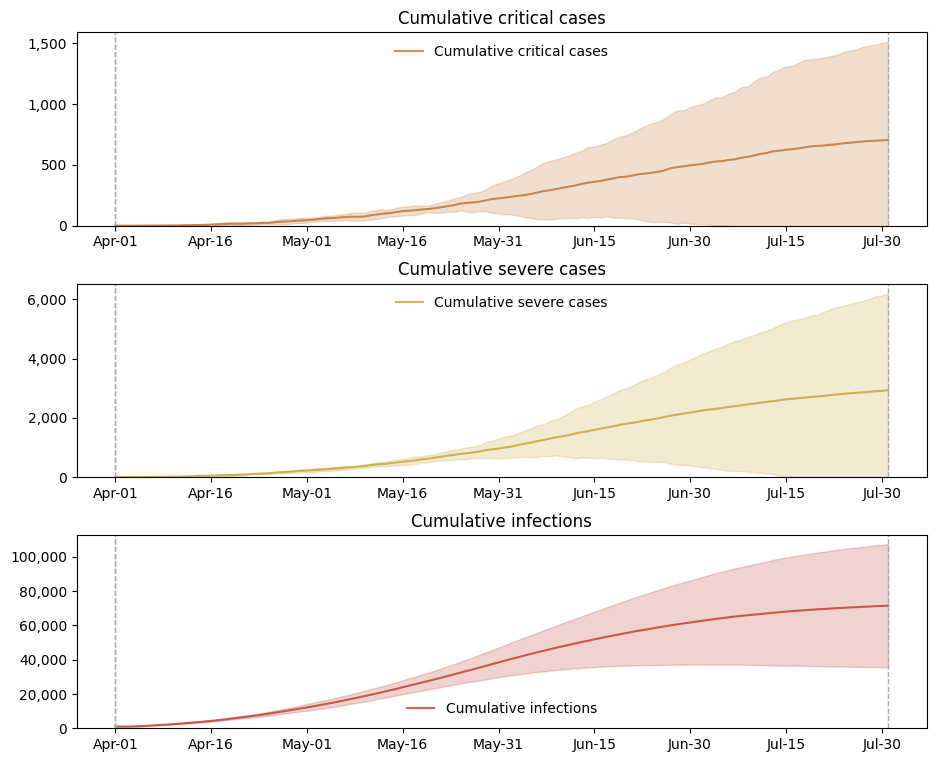

In [36]:
msim.mean()
msim.plot(to_plot=['cum_critical', 'cum_severe', 'cum_infections'])